In [1]:
!pip install transformers accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 85.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [2]:
!pip uninstall diffusers
!pip install diffusers

Found existing installation: diffusers 0.27.2
Uninstalling diffusers-0.27.2:
  Would remove:
    /usr/local/bin/diffusers-cli
    /usr/local/lib/python3.10/dist-packages/diffusers-0.27.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/diffusers/*
Proceed (Y/n)? y
  Successfully uninstalled diffusers-0.27.2
  Using cached diffusers-0.27.2-py3-none-any.whl (2.0 MB)


In [3]:
import torch
from diffusers import StableCascadeDecoderPipeline, StableCascadePriorPipeline
from diffusers.models import StableCascadeUNet

torch.backends.cuda.enable_mem_efficient_sdp(False)
torch.backends.cuda.enable_flash_sdp(False)

device = "cuda"
num_images_per_prompt = 1

prior = StableCascadePriorPipeline.from_pretrained("stabilityai/stable-cascade-prior",
                                                    torch_dtype=torch.bfloat16).to(device)
decoder = StableCascadeDecoderPipeline.from_pretrained("stabilityai/stable-cascade",
                                                       torch_dtype=torch.float16).to(device)

prompt = "A rainy day in New York city"
negative_prompt = ""

prior_output = prior(
    prompt=prompt,
    height=1024,
    width=1024,
    negative_prompt=negative_prompt,
    guidance_scale=4.0,
    num_images_per_prompt=num_images_per_prompt,
    num_inference_steps=20
)
decoder_output = decoder(
    image_embeddings=prior_output.image_embeddings.half(),
    prompt=prompt,
    negative_prompt=negative_prompt,
    guidance_scale=0.0,
    output_type="pil",
    num_inference_steps=10
).images

#Now decoder_output is a list with PIL images

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

model_index.json:   0%|          | 0.00/451 [00:00<?, ?B/s]

Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/6.25G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/117 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

decoder/config.json:   0%|          | 0.00/1.32k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/2.80G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

vqgan/config.json:   0%|          | 0.00/328 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/73.6M [00:00<?, ?B/s]

tokenizer/tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

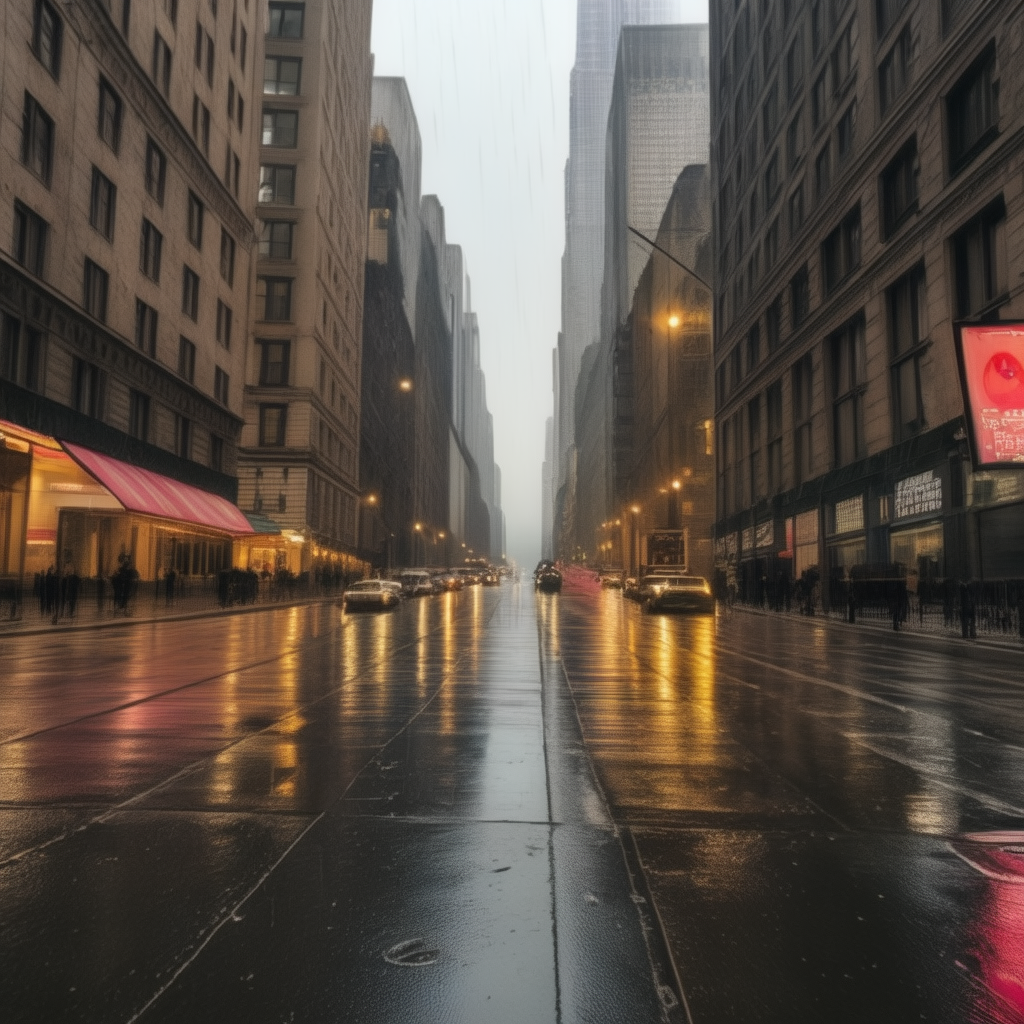

In [4]:
display(decoder_output[0])